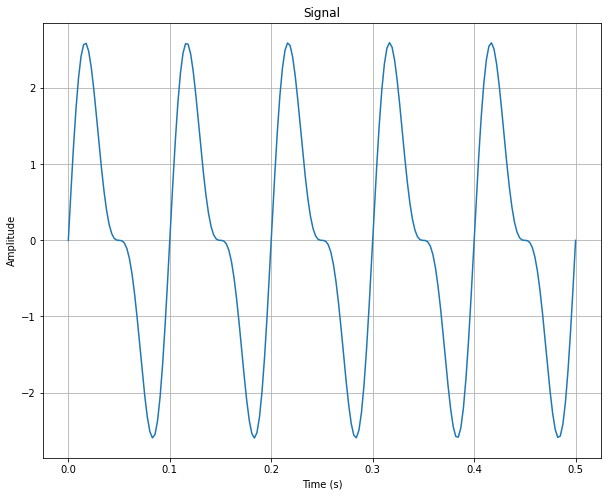

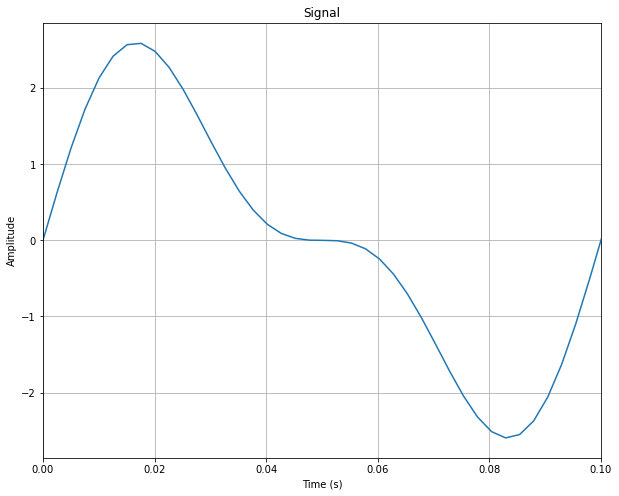

In [1]:
### Q2-a

# a. Here's how to plot the signal over one period and calculate its frequency:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 0.5, 200)
x = 2*np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
plt.figure(figsize=(10, 8))
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.grid()
plt.show()
# The plot will show a graph of the sinusoidal signal over one period. The frequency of the signal is calculated using Fourier transform and printed on the console.
plt.figure(figsize=(10, 8))
plt.plot(t, x)
plt.xlim(0,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.grid()
plt.show()

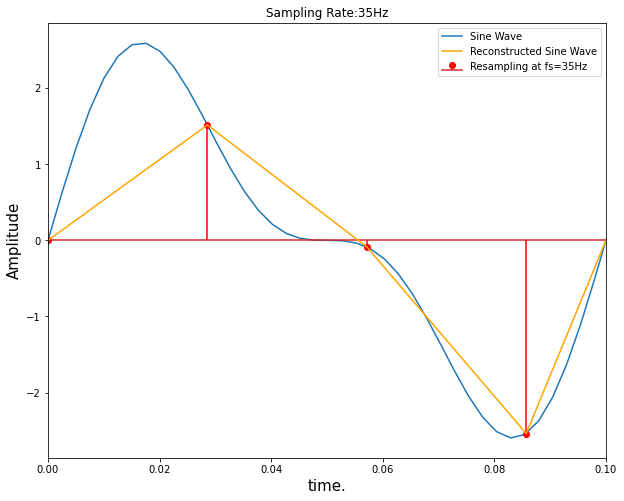

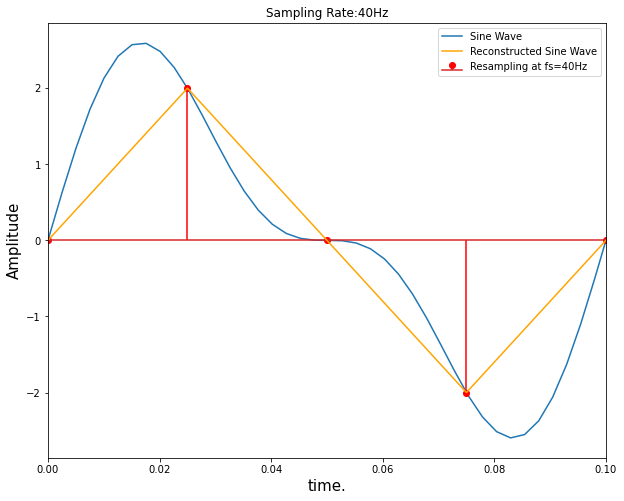

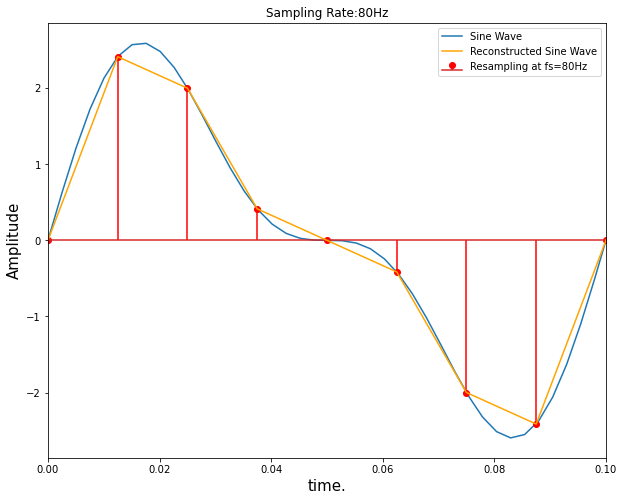

In [2]:
### Q2-b

def frq(frequency):
    t = np.linspace(0, 0.5, 200)
    x1 = 2*np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
    T = 1 / frequency
    n = np.arange(0, 0.5 / T)
    nT = n * T
    x2 = 2*np.sin(2*np.pi*10*nT) + np.sin(2*np.pi*20*nT)
    
    plt.figure(figsize=(10, 8))
    plt.plot(t, x1,label=f'Sine Wave')
    plt.stem(nT, x2, 'red', label=f'Resampling at fs={frequency}Hz')
    plt.plot(nT, x2, 'orange', label='Reconstructed Sine Wave')
    plt.title(f'Sampling Rate:{frequency}Hz')
    plt.xlabel('time.', fontsize=15)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlim(0,0.1)
    plt.legend(fontsize=10, loc='upper right')

for i in [35,40,80]:
    frq(i)


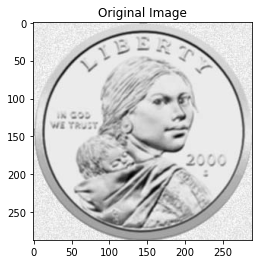

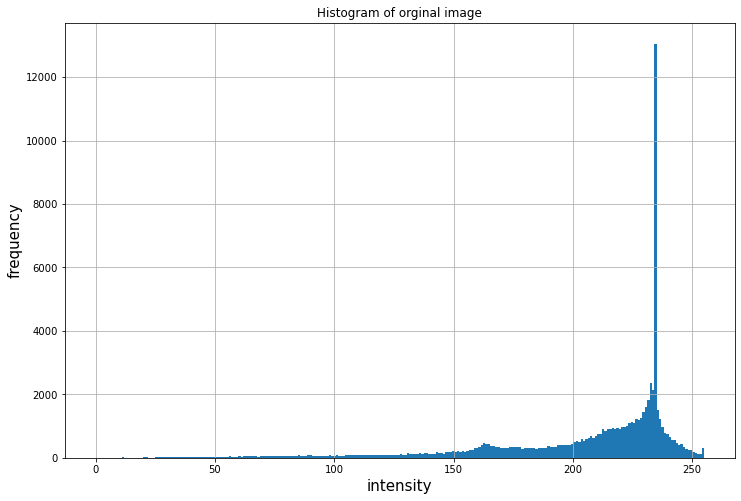

In [3]:
### Q3-a

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread('coin.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

plt.figure(figsize=(12, 8))
plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.title('Histogram of orginal image')
plt.xlabel('intensity', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.grid()
plt.show()


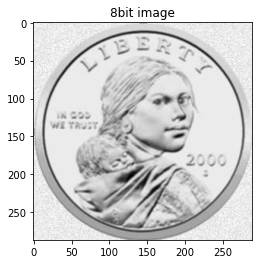

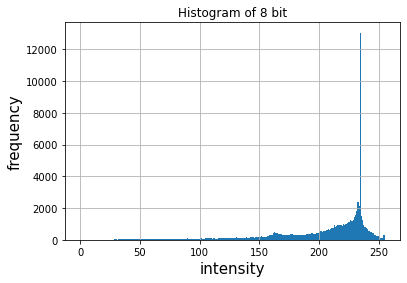

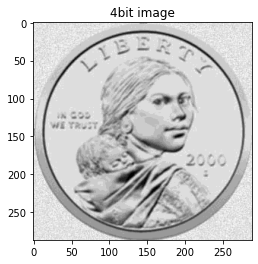

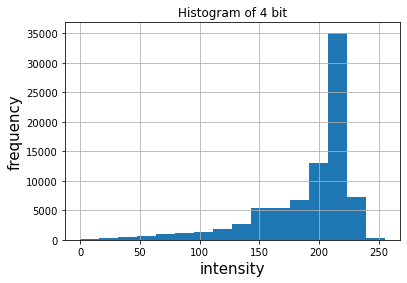

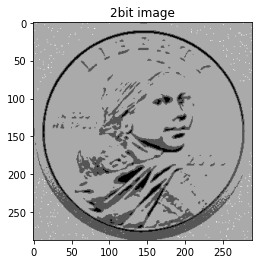

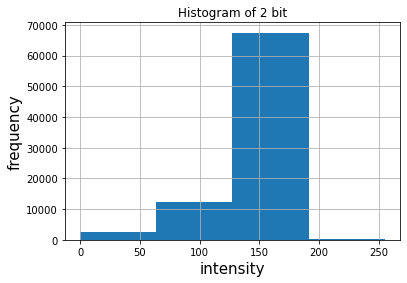

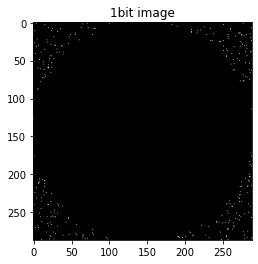

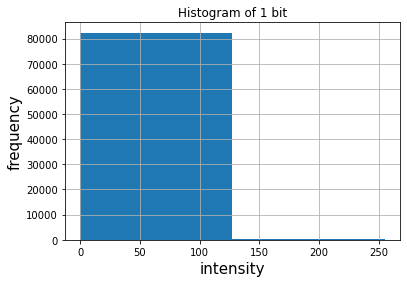

In [4]:
### Q3-b&c

factors = [8,4,2,1]
for k in factors:
    bins = np.linspace(0, img.max(), 2**k)
    image = np.digitize(img, bins)
    image = (np.vectorize(bins.tolist().__getitem__)(image-1).astype(int))
    plt.imshow(image,cmap='gray')
    plt.title(f'{k}bit image')
    plt.show()
    plt.hist(image.ravel(), bins=2**k, range=(0, 255))
    plt.title(f'Histogram of {k} bit')
    plt.xlabel('intensity', fontsize=15)
    plt.ylabel('frequency', fontsize=15)
    plt.grid()
    plt.show()


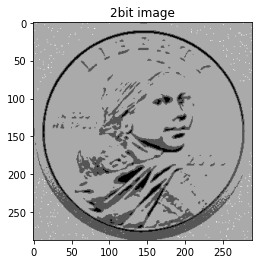

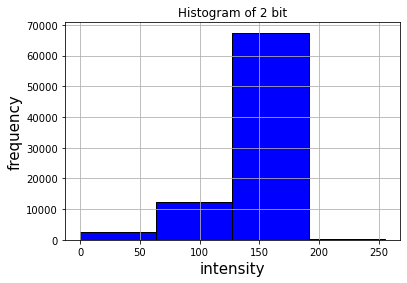

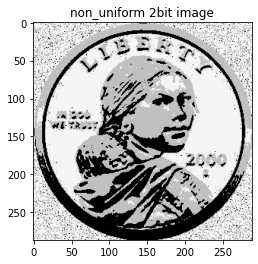

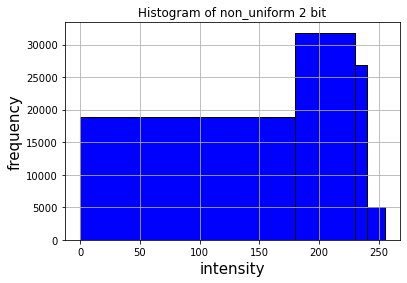

In [5]:
factors = [2]
for k in factors:
    bins = np.linspace(0, img.max(), 2**k)
    image = np.digitize(img, bins)
    image = (np.vectorize(bins.tolist().__getitem__)(image-1).astype(int))
    plt.imshow(image,cmap='gray')
    plt.title(f'{k}bit image')
    plt.show()
#     plt.hist(img.ravel() ,bins=256, range=(0, 255),color='red',edgecolor="white",alpha=0.5)
    plt.hist(image.ravel(), bins=2**k, range=(0, 255),color='blue',edgecolor="black",alpha=1)
    plt.title(f'Histogram of {k} bit')
    plt.xlabel('intensity', fontsize=15)
    plt.ylabel('frequency', fontsize=15)
    plt.grid()
    plt.show()
    
# Define the quantization levels based on the histogram
levels = [180,230,240,255 ]

non_uniform = np.zeros_like(img)
for i in range(len(levels)):
    if i == 0:
        non_uniform[img <= levels[i]] = 0
    elif i == len(levels)-1:
        non_uniform[img > levels[i-1]] = levels[i-1]
    else:
        non_uniform[(img >= levels[i-1]) & (img < levels[i])] = levels[i-1]
        
plt.imshow(non_uniform,cmap='gray')
plt.title(f'non_uniform {2}bit image')
plt.show()
# plt.hist(img.ravel() ,bins=256, range=(0, 255),color='red',edgecolor="white",alpha=0.7)
plt.hist(non_uniform.ravel() ,bins=[0,180,230,240,255], range=(0, 255),color='blue',edgecolor="black",alpha=1)
plt.title(f'Histogram of non_uniform {2} bit')
plt.xlabel('intensity', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.grid()
plt.show()

In [6]:
### Q3-d

mse_uniform = np.mean((image - img)**2) 
print(f"Mean Square Error (Uniform Quantization): {mse_uniform:.2f}")
mse_non_uniform = np.mean((non_uniform - img)**2)
print(f'Mean Squared Error (Non-Uniform): {mse_non_uniform}')


Mean Square Error (Uniform Quantization): 3117.06
Mean Squared Error (Non-Uniform): 77.86016744096013


In [7]:
### Q4-a


import numpy as np
import matplotlib.pyplot as plt

def compute_dct_basis(N):
    basis = np.zeros((N*N, N, N))
    for i in range(N):
        for j in range(N):
            # Compute the DCT basis function for (i, j)
            dct_basis = np.zeros((N, N))
            for p in range(N):
                for q in range(N):
                    dct_basis[p, q] = np.cos(((2*p + 1)*i*np.pi)/(2*N)) * np.cos(((2*q + 1)*j*np.pi)/(2*N))

            # Normalize the DCT basis function and store it in the set
            basis[i*N+j] = dct_basis / np.sqrt(2*N) if i == 0 and j == 0 else dct_basis / np.sqrt(N)

    return basis


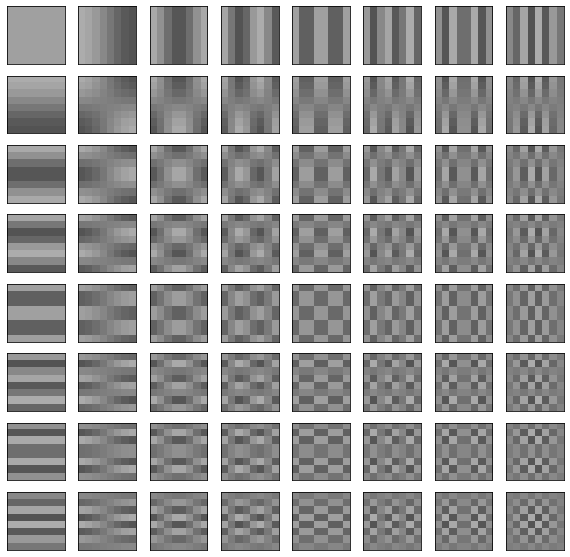

In [8]:
N = 8
basis = compute_dct_basis(N)

# Plot the basis images
fig, axs = plt.subplots(N, N, figsize=(10,10))
for i in range(N):
    for j in range(N):
        axs[i, j].imshow(basis[i*N+j], cmap='gray', vmin=-1, vmax=1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
plt.show()

In [9]:
### Q4-b

import numpy as np 
def compress(img, basis_images, n): 
    height, width  = img.shape 
    N = basis_images[0].shape[0] 
    compressed_img = np.zeros((height, width)) 
    for i in range(height // N): 
        for j in range(width // N): 
            block = img[i*N:(i+1)*N, j*N:(j+1)*N] 
            dct_coeffs = [] 
            for basis in basis_images: 
                dct_coeff = np.sum(block * basis) 
                dct_coeffs.append(dct_coeff) 
            dct_coeffs = np.array(dct_coeffs)
            sorted_coeffs = np.argsort(np.abs(dct_coeffs))[::-1]   
            dct_coeffs[sorted_coeffs[n:]] = 0 
            reconstructed_block = np.zeros((N, N)) 
            for k, basis in enumerate(basis_images): 
                reconstructed_block += dct_coeffs[k] * basis 
            reconstructed_block *= np.sqrt(2*N) 
            compressed_img[i*N:(i+1)*N, j*N:(j+1)*N] = reconstructed_block     
    return compressed_img

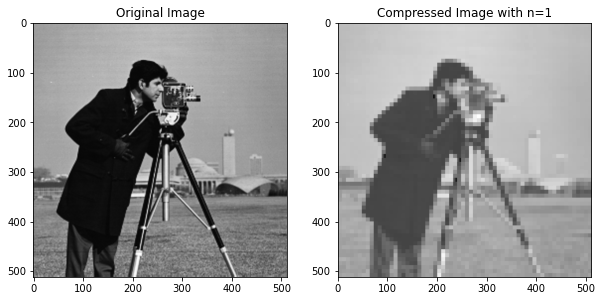

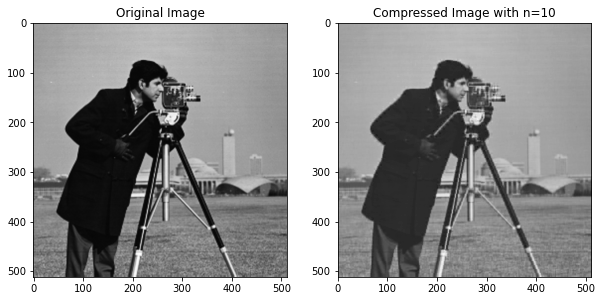

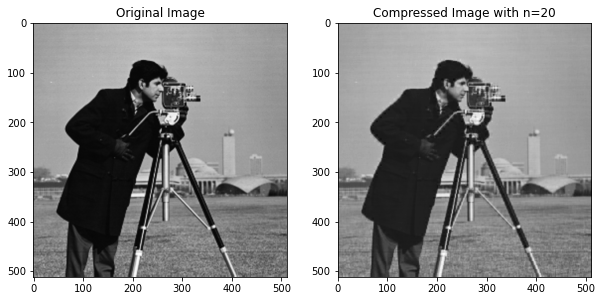

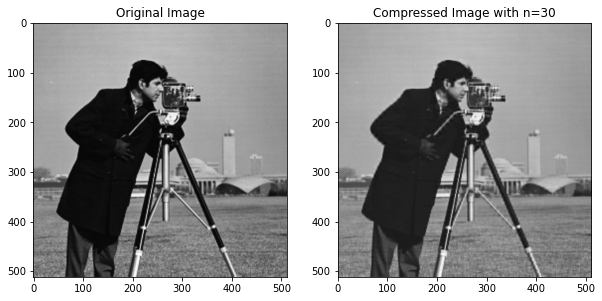

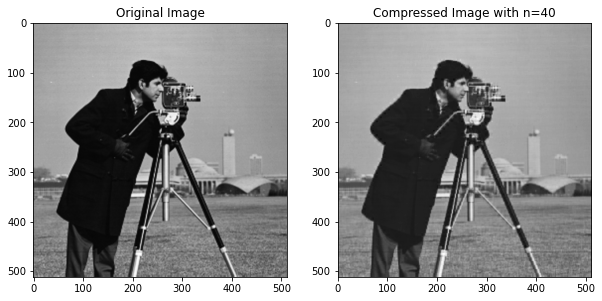

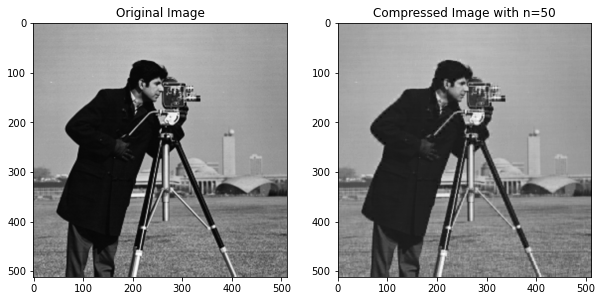

In [12]:
### Q4-c
import cv2 as cv

img = cv.imread('cameraman.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
N = 8
basis = compute_dct_basis(N)
# compressed_img = compress(img, basis, n=j)
for j in [1,10,20,30,40,50]:
    compressed_img = compress(img, basis, n=j)

    # Display the original and compressed images side-by-side.
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(compressed_img, cmap='gray')
    ax[1].set_title(f'Compressed Image with n={j}')
    plt.show()

